# Shor's algorithm 

<img src="Screenshot 2025-03-05 220405.png" alt="Token" width="1200">
Source : Fundamentals of Quantum Computing, Theory and Practice (2021) by Venkateswaran Kasirajan

In [8]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
import math

In [9]:
numberofqubits = 7
shots = 1024
q = QuantumRegister(numberofqubits , 'q')
c = ClassicalRegister(4 , 'c')
qc = QuantumCircuit(q, c)

In [10]:
# Initialize source and target registers
qc.h(0)
qc.h(1)
qc.h(2)
qc.x(6)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

In [11]:
# Modular exponentiation 7^x mod 15
qc.cx(q[2],q[4] )
qc.cx(q[2],q[5] )
qc.cx(q[6],q[4] )
qc.ccx(q[1],q[5],q[3] )
qc.cx(q[3],q[5] )
qc.ccx(q[1],q[4],q[6] )
qc.cx(q[6],q[4] ) #
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

In [12]:
def iqft_cct (qc, b, n):
    for i in range (n):
        for j in range (1, i+1):
            qc.cp( -math.pi / 2** ( i -j + 1 ), b[j - 1], b[i])
        qc.h(b[i])
    qc.barrier()

In [13]:
# IQFT for first 3 registers 
iqft_cct (qc, q, 3)

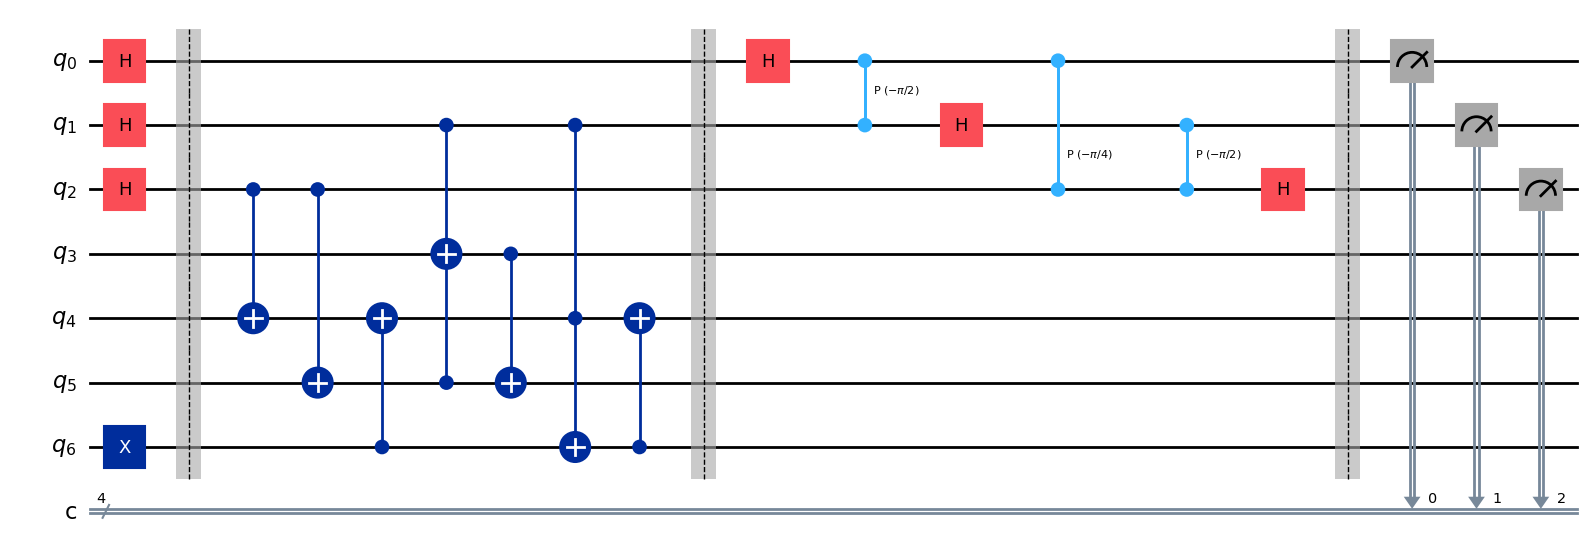

In [14]:
# Measure
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.draw(output='mpl')

In [15]:
from qiskit import transpile
from qiskit_aer import AerSimulator

In [16]:
backend = AerSimulator()
transpiled_qc = transpile(qc, backend)
job = backend.run(transpiled_qc, shots=shots)
counts = job.result().get_counts()

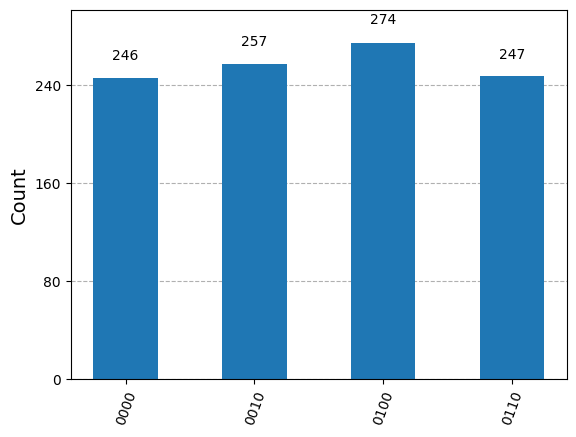

In [17]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [18]:
r=4

In [19]:
f1=math.gcd(int(7**(r/2))-1,15)
f2=math.gcd(int(7**(r/2)+1),15) 

In [20]:
print('Factors of 15 are',f1,'and',f2)

Factors of 15 are 3 and 5


<img src="144.png" alt="Token" width="1200">